In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import roc_curve, auc

In [11]:
df = pd.read_csv('trainms.csv')

In [12]:
df['work_interfere']=df['work_interfere'].fillna("Maybe")
df['self_employed']=df['self_employed'].fillna("Dont Know")

In [13]:
temp = df.Gender
temp = temp.replace(to_replace=["A little about you","something kinda male?","Enby","fluid","Genderqueer","Trans-female","Nah","Androgyne","Agender","male leaning androgynous","Trans woman","Neuter","Female (trans)","queer","non-binary"],value="T")
temp = temp.replace(["Female","female","Cis Female","F","Woman","f","Femake","Female ","woman","cis-female/femme","Female (cis)"],'F')
temp = temp.replace(["M","Male","male","m","Male-ish","maile","Cis Male","Mal","Male ","Make","Guy (-ish) ^_^","Man","msle","Mail","cis male"],'M')
temp.unique()
df.Gender = temp

In [20]:
to_drop_columns = ['state','comments','s.no','Timestamp']+['supervisor','coworkers','Country','anonymity','self_employed'] #+['Country','supervisor','coworkers','phys_health_interview','anonymity','self_employed','remote_work','tech_company','obs_consequence','phys_health_consequence','seek_help','Gender']

In [21]:
features = df.drop(columns=to_drop_columns)

In [22]:
target = features.pop('treatment')
colmns = features.columns

In [23]:
for column in colmns:
    features = pd.concat([features,pd.get_dummies(df[column], prefix=column)],axis=1)
    features.drop([column],axis=1, inplace=True)

In [30]:
labels,_ = pd.factorize(target)

In [ ]:
le = preprocessing.LabelEncoder()
features = df.apply(le.fit_transform)
labels = features.pop("treatment")

In [ ]:
le = preprocessing.LabelEncoder()
features = df.apply(le.fit_transform)

onc = preprocessing.OneHotEncoder()
features = onc.fit_transform(features)

In [28]:
features.head()
labels[0:5]

(array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 

In [ ]:
le = preprocessing.LabelEncoder()
features = df.apply(le.fit_transform)

onc = preprocessing.OneHotEncoder()
features = onc.fit_transform(features).toarray()

onc = preprocessing.OneHotEncoder()
labels = onc.fit_transform(target).toarray()

#labels,uniques = features["treatment"] # pd.factorize(target)

In [31]:
print(features.shape,labels.shape)

(1000, 103) (1000,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split( features, labels, test_size = 0.3, random_state = 100)

In [33]:
X_train['work_interfere'].value_counts()

KeyError: 'work_interfere'

In [42]:
# gini model fitting

clf_gini = DecisionTreeClassifier(criterion = "gini",
                               max_depth=5, min_samples_leaf=0.1)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# entropy model fitting
clf_entropy = DecisionTreeClassifier(criterion = "entropy",max_depth=4,presort=True)
clf_entropy.fit(X_train, y_train)

In [43]:
# predicting gini train
gini_pred = clf_gini.predict(X_train)
accuracy_score(y_train,gini_pred)*100

82.42857142857143

In [ ]:
# predicting entropy train
entropy_pred = clf_entropy.predict(X_train)
accuracy_score(y_train,entropy_pred)*100

In [44]:
# predicting gini test
gini_pred = clf_gini.predict(X_test)
accuracy_score(y_test,gini_pred)*100

86.0

In [ ]:
# predicting entropy test
entropy_pred = clf_entropy.predict(X_test)
accuracy_score(y_test,entropy_pred)*100

In [ ]:
# roc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, entropy_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

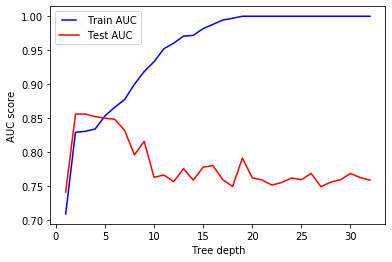

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

max_depths = np.linspace(1, 32, 32, endpoint=True)
x_train,x_test = X_train,X_test

train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

[0.1 0.2 0.3 0.4 0.5]


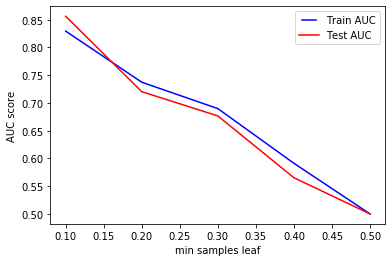

In [39]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

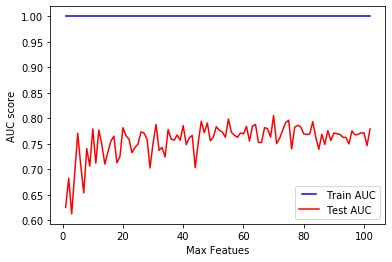

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt

max_features = list(range(1,X_train.shape[1]))
x_train,x_test = X_train,X_test

train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Max Featues")
plt.show()

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(decision_function_shape='oyo',gamma='scale')
clf_svm.fit(X_train,y_train)

In [ ]:
svm_pred = clf_svm.predict(X_train)
accuracy_score(y_train,svm_pred)*100

In [ ]:
svm_pred = clf.predict(X_test)
accuracy_score(y_test,svm_pred)*100

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=129).fit(X_train, y_train)

In [ ]:
lr_pred = clf_lr.predict(X_train)
accuracy_score(y_train,lr_pred)*100

In [ ]:
lr_pred = clf_lr.predict(X_test)
accuracy_score(y_test,lr_pred)*100

## Test score for leaderboard

In [ ]:
test = pd.read_csv('testms.csv')
temp = test.Age
temp = temp.replace(to_replace=-1,value=22)
test.Age = temp

test['work_interfere']=test['work_interfere'].fillna("Maybe")
test['self_employed']=test['self_employed'].fillna("Dont Know")

In [ ]:
#Validate test gender
temp = test.Gender
temp = temp.replace(to_replace=["Male","male","m","Malr","Male ","Cis Man"],value='M')
temp = temp.replace(to_replace=["female","F","Female","Woman","femail","f"],value='F')
temp = temp.replace(to_replace=["p","Female (trans)","ostensibly male, unsure what that really means"],value='T')
test.Gender = temp

In [ ]:
tst_features = test.drop(columns=to_drop_columns)
print(X_train.columns)
print(tst_features.columns)
# test.columns
# test.columns

In [ ]:
#predict testing data
# col = to_drop_columns
# col.remove('treatment')
# test_features = test.drop(columns=col)
le = preprocessing.LabelEncoder()
test_features = tst_features.apply(le.fit_transform)

pred = clf_lr.predict(test_features)

In [ ]:
# Submission generation
index = [str(i) for i in range(1,len(pred)+1)]
values = ['Yes' if val==0 else 'No' for i,val in enumerate(pred)]
submission_result = pd.DataFrame(values, index=index,columns=['treatment'])
submission_result.index.name = "s.no"

file_name="submission.csv"
submission_result.to_csv(file_name, sep=',')